In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



data = pd.read_csv("/data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/data.csv'

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            8760 non-null   object 
 1   Rented Bike Count               8760 non-null   int64  
 2   Hour                            8760 non-null   int64  
 3   Temperature(Celsius)            8760 non-null   float64
 4   Humidity(%)                     8760 non-null   int64  
 5   Wind speed (m/s)                8760 non-null   float64
 6   Visibility (10m)                8760 non-null   int64  
 7   Dew point temperature(Celsius)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)         8760 non-null   float64
 9   Rainfall(mm)                    8760 non-null   float64
 10  Snowfall (cm)                   8760 non-null   float64
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


,Rented Bike Count,Hour,Temperature(Celsius),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Celsius),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


 Variables that need conversion, date is a string so should be converted.

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

EXPLANATORY DATA ANALYSIS

Target variable: Rented bike count

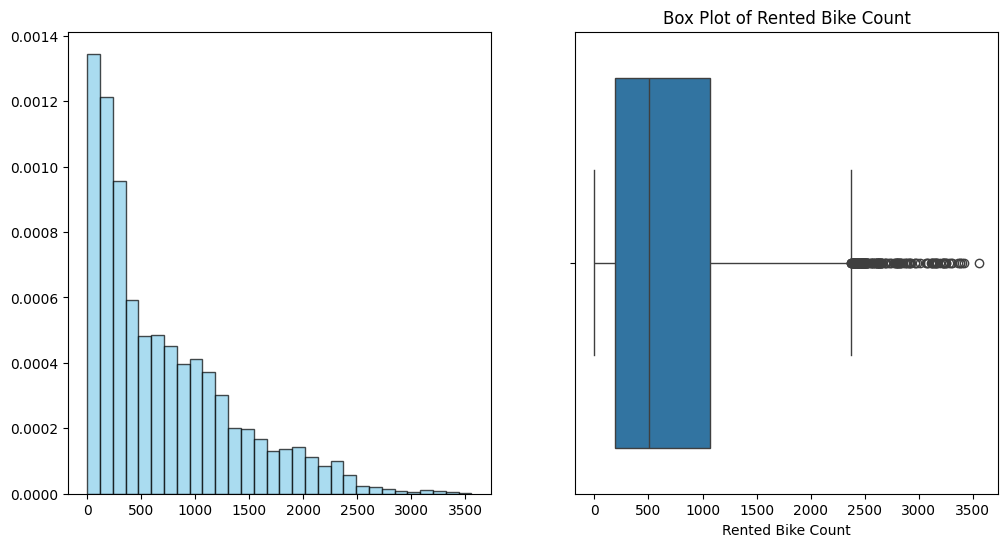

In [ ]:
rented_bike_count = data['Rented Bike Count']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(rented_bike_count, bins=30, color='skyblue', alpha=0.7, edgecolor='black', density=True, label='Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Rented Bike Count'])
plt.title('Box Plot of Rented Bike Count')
plt.show()


HOUR

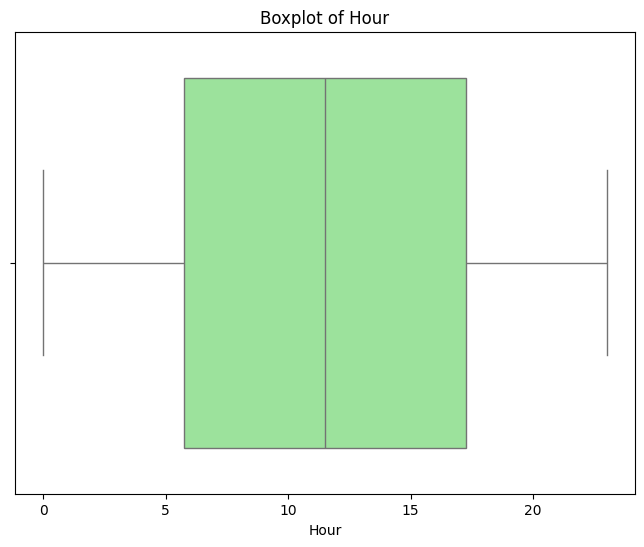

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Hour'], color='lightgreen')
plt.title('Boxplot of Hour')
plt.xlabel('Hour')
plt.show()



Temperature

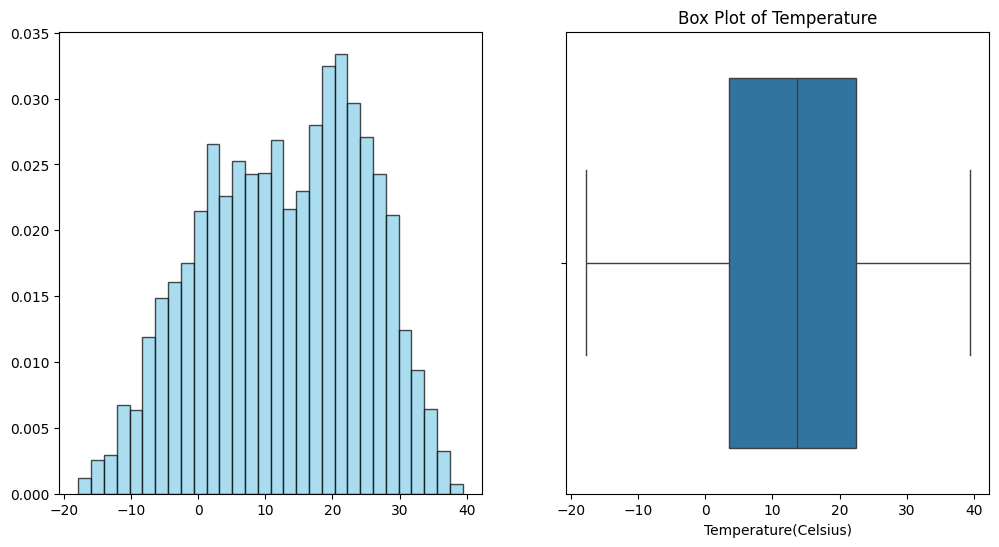

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data['Temperature(Celsius)'], bins=30, color='skyblue', alpha=0.7, edgecolor='black', density=True, label='Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Temperature(Celsius)'])
plt.title('Box Plot of Temperature')
plt.show()


Humidity

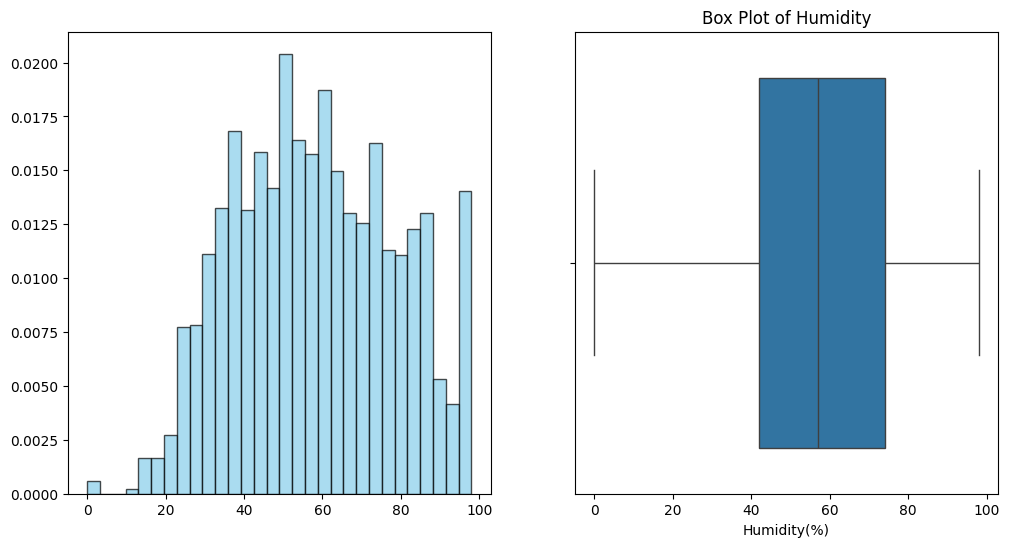

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data['Humidity(%)'], bins=30, color='skyblue', alpha=0.7, edgecolor='black', density=True, label='Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Humidity(%)'])
plt.title('Box Plot of Humidity')
plt.show()

Wind Speed

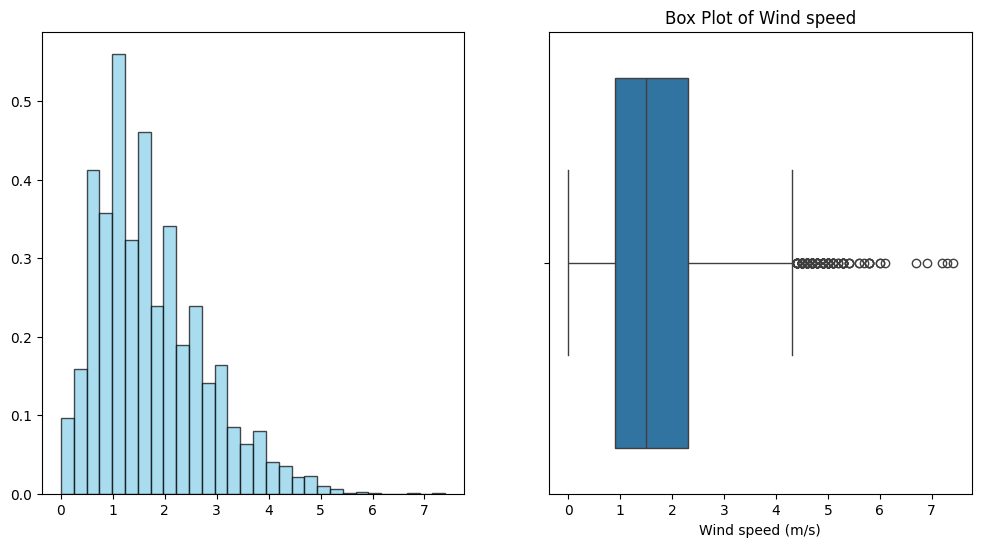

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data['Wind speed (m/s)'], bins=30, color='skyblue', alpha=0.7, edgecolor='black', density=True, label='Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Wind speed (m/s)'])
plt.title('Box Plot of Wind speed')
plt.show()

Visibility

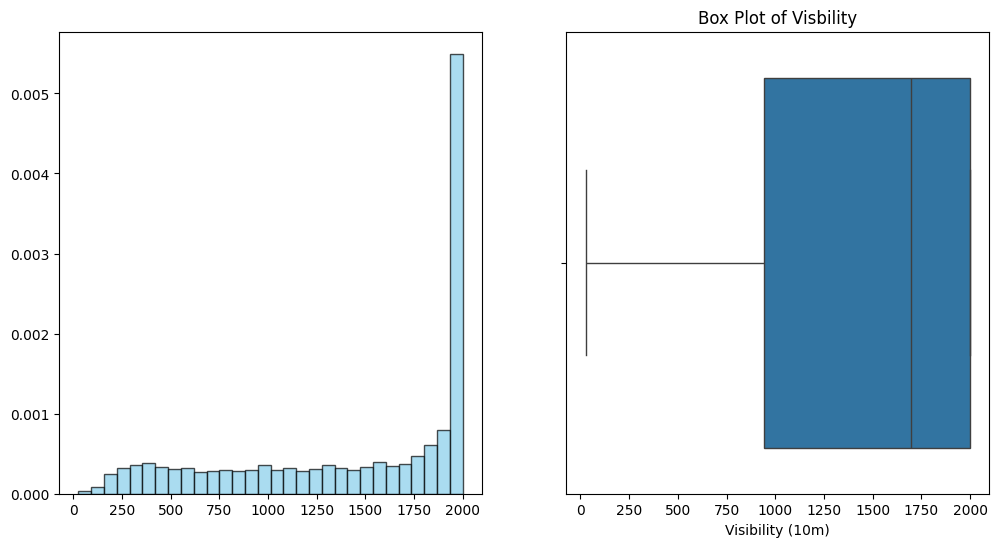

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data['Visibility (10m)'], bins=30, color='skyblue', alpha=0.7, edgecolor='black', density=True, label='Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Visibility (10m)'])
plt.title('Box Plot of Visbility')
plt.show()

Dew point temperature

**Data Partition**

In [ ]:
y = data["Rented Bike Count"]
X = data.drop(["Rented Bike Count", "Date"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1)

**Exploring features**

In [6]:
YX = pd.concat([data['Rented Bike Count'], X], axis=1)
np.corrcoef(YX.T)

NameError: name 'data' is not defined

**Baseline model**

In [ ]:
baseline_prediction = y_train.mean()
baseline_mse = mean_squared_error(y_test, [baseline_prediction] * len(y_test))
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
baseline_r2 = r2_score(y_test, [baseline_prediction] * len(y_test))

In [ ]:
print("Baseline Model Performance:")
print(f"Mean Squared Error (MSE): {baseline_mse}")
print(f"Mean Absolute Error (MAE): {baseline_mae}")
print(f"R2 Score: {baseline_r2}")

Baseline Model Performance:
Mean Squared Error (MSE): 415046.8724771169
Mean Absolute Error (MAE): 517.209267686245
R2 Score: -9.834909514605528e-05


**OLS model**

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)


In [ ]:
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ols_mse = mean_squared_error(y_test, y_pred)
ols_mae = mean_absolute_error(y_test, y_pred)
ols_r2 = r2_score(y_test, y_pred)

In [ ]:
print("OLS Regression Model Performance on Test Set:")
print(f"Mean Squared Error (MSE): {ols_mse}")
print(f"Mean Absolute Error (MAE): {ols_mae}")
print(f"R2 Score: {ols_r2}")

OLS Regression Model Performance on Test Set:
Mean Squared Error (MSE): 226015.8781047909
Mean Absolute Error (MAE): 350.2757413354798
R2 Score: 0.45539137492391657


In [ ]:
print("\nComparison to Baseline:")
print(f"Improvement in MSE: {baseline_mse - ols_mse}")
print(f"Improvement in MAE: {baseline_mae - ols_mae}")
print(f"Improvement in R2: {ols_r2 - baseline_r2}")


Comparison to Baseline:
Improvement in MSE: 189030.99437232598
Improvement in MAE: 166.9335263507652
Improvement in R2: 0.4554897240190626


**Ridge Regression Model**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid for alpha values in Ridge regression
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

ridge_model = Ridge()
ridge_grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# Retrieve the best alpha value found by GridSearchCV
best_alpha = ridge_grid_search.best_params_['alpha']
print(f"Optimal alpha for Ridge regression: {best_alpha}")

ridge_best_model = Ridge(alpha=best_alpha)
ridge_best_model.fit(X_train, y_train)

y_pred_ridge = ridge_best_model.predict(X_test)

# Calculate performance metrics for the Ridge model
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Model Performance on Test Set:")
print(f"Mean Squared Error (MSE): {ridge_mse}")
print(f"Mean Absolute Error (MAE): {ridge_mae}")
print(f"R2 Score: {ridge_r2}")

Optimal alpha for Ridge regression: 100

Ridge Regression Model Performance on Test Set:
Mean Squared Error (MSE): 225797.19190341167
Mean Absolute Error (MAE): 349.78958733613666
R2 Score: 0.4559183219351396


**Lasso Model**

In [ ]:
from sklearn.linear_model import Lasso


In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # You can add more values or fine-tune as needed

lasso_model = Lasso(max_iter=10000)
lasso_grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

best_alpha = lasso_grid_search.best_params_['alpha']
print(f"Optimal alpha for Lasso regression: {best_alpha}")

lasso_best_model = Lasso(alpha=best_alpha, max_iter=10000)
lasso_best_model.fit(X_train, y_train)

y_pred_lasso = lasso_best_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Model Performance on Test Set:")
print(f"Mean Squared Error (MSE): {lasso_mse}")
print(f"Mean Absolute Error (MAE): {lasso_mae}")
print(f"R2 Score: {lasso_r2}")

Optimal alpha for Lasso regression: 1

Lasso Regression Model Performance on Test Set:
Mean Squared Error (MSE): 225905.09760096547
Mean Absolute Error (MAE): 350.10450062663193
R2 Score: 0.4556583120009906
